# Assignment
**Rationale** This dataset includes all TripAdvisor reviews written in 2015 (through part of 2016) for high review volume Vegas resorts and was collected as part of a large web crawl of over 50 Million online reviews at over 428k worldwide hotels. 

* [Dataset](https://drive.google.com/drive/folders/1nUIOHqvOoF5EkST8u_pMcL7gvKtCy0La?usp=sharing)
    * `vegas2015reviews.csv` contains the reviews 
    * `vegas_venue_info.csv` contains a list of venues in Vegas
    * Note that `gd` is the venue ID in both datasets

**Instructions: Please open this notebook in google colab and once you have completed the assignment, press share on the top right. Make available for anyone with a link. Then send the link to: y.bart@northeastern.edu and govergoor@saunders.rit.edu. Briefly describe how much time it took and what difficulties you encountered.**

# Problem 1: Sentiment Analysis 

## First, let's get to know the dataset.

1. Read in the vegas reviews dataset (call this `df`)
1. Convert any columns that look like dates into Pandas datetime columns.
1. Read in the venue info dataset and merge it with the reviews dataset. (call the resulting dataframe `df`, i.e. write over the old `df`)

Answer the following for the resulting merged dataframe, `df`:
1. How many reviews are there?
1. How many unique hotels are there? Note `gd` is the ID variable for hotels on TripAdvisor.
1. What are the unique types of travel categories?
1. Plot a histogram of the review ratings. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?

## Sentiment 

Use `TextBlob` library to compute the polarity and subjectivity of every review.

1. Compare the histogram of review polarity with review ratings. How are they different? What might you conclude based on this difference about how people rate and how people write?
1. To what degree are polarity and subjectivity correlated with ratings?
1. Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?

In [ ]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from pprint import pprint
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

### Reading and merging the dataframes

In [11]:
## 1. Read in the vegas reviews dataset (call this df)

df = pd.read_csv('/content/drive/MyDrive/YelpTask/vegas2015reviews.csv')
df_venue = pd.read_csv('/content/drive/MyDrive/YelpTask/vegas_vinfo.csv')

## 2. Convert any columns that look like dates into Pandas datetime columns.

df['mgr_res_date']=  pd.to_datetime(df['mgr_res_date'], format='%Y-%m-%d')
df['ratingDate']=  pd.to_datetime(df['ratingDate'], format='%Y-%m-%d')

df['stay_month'] = pd.to_datetime(df['stay_month'], format='%m', errors='coerce')
df['stay_year'] = pd.to_datetime(df['stay_year'], format='%Y', errors='coerce')

df['stay_month'] = df.stay_month.dt.month
df['stay_year'] = df.stay_year.dt.year

## 3. Read in the venue info dataset and merge it with the reviews dataset. (call the resulting dataframe df, i.e. write over the old df)

df = df.merge(df_venue, on='gd', how='left')


### Cleaning the merged dataframe

*   Remove columns containing all null values
*   We see that column 'rdetails' contains all null values
*   Columns contain a single value can be dropped from the dataframe
*   We can remove columns 'Unnamed: 0_x' and 'Unnamed: 0_y' after merging the dfs

In [12]:
print(df.isnull().all(), '\n')
print('unique vals in rdetails col:', df.rdetails.unique(), '\n')
print('unique vals in rsubrating col:', df.rsubrating.unique(), '\n')
print('unique vals in vtype col:', df.vtype.unique(), '\n')

## drop the above columns inplace
df.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'rdetails', 'rsubrating', 'vtype'], axis = 1, inplace=True)



Unnamed: 0_x       False
gd                 False
helpful_num        False
location           False
mgrRspnDummy       False
mgr_res_date       False
mrtext             False
ratingDate         False
review_id          False
reviewrating       False
reviewtext         False
reviewtitle        False
stay_month         False
stay_year          False
travel_category    False
username           False
Unnamed: 0_y       False
ranking            False
rating_vol         False
rdetails            True
lnglat             False
rsubrating         False
vtype              False
amenities          False
details            False
v_name             False
rating_cat         False
dtype: bool 

unique vals in rdetails col: [nan] 

unique vals in rsubrating col: ['{}'] 

unique vals in vtype col: ['Hotel_Review'] 



### Exploring the merged Dataframe

1. How many reviews are there?

2. How many unique hotels are there?

3. What are the unique types of travel categories?

4. Plot a histogram of the review ratings. 

We have 46644 unique reviews

We have 34 unique hotels

We have 6 unique travel categories 



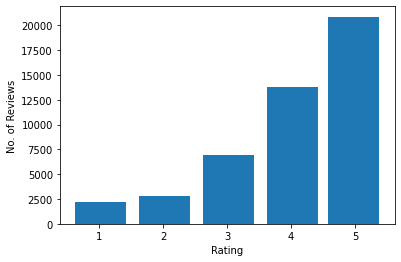

In [13]:
#### To get the no. of review count we can count unique review_ids
print('We have {} unique reviews\n'.format(len(df.review_id.unique())))
print('We have {} unique hotels\n'.format(len(df.gd.unique())))
print('We have {} unique travel categories \n'.format(len(df.travel_category.unique())))

counts, bins = np.histogram(df['reviewrating'], bins=100)
bins = bins[:-1] + (bins[1] - bins[0])/2
plt.bar(bins, counts)
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.show()

4. How would you describe the overall review ratings on TripAdvisor for Vegas resorts?
    * From the below values we can see that the overall rating were positive with 44.77% users giving the hotel rating 5 and 29.5% giving 4 

In [14]:
## To obtain % of users with given rating 
print('The average user rating for Las Vegas Hotels is {:.2f}\n'.format(df.reviewrating.mean()))
for i in range(5, 0, -1):
  print('{} users rated {}: {:.2f} %'.format(len(df[df['reviewrating']==i]), i, len(df[df['reviewrating']==i])*100/len(df)))

The average user rating for Las Vegas Hotels is 4.04

20883 users rated 5: 44.77 %
13761 users rated 4: 29.50 %
6985 users rated 3: 14.98 %
2836 users rated 2: 6.08 %
2179 users rated 1: 4.67 %


### Sentiment

1) Compare the histogram of review polarity with review ratings. How are they different?

In [16]:
## Let's create functions to calculate polarity and subjectivity of a review
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## Create two new columns for polarity and subjectivity

df['polarity'] = df['reviewtext'].apply(get_polarity)
df['subjectivity'] = df['reviewtext'].apply(get_subjectivity)

The average user review polarity for Las Vegas Hotels is 0.28

% of users review polarity b/w 0.75 - 1.0 : 0.93 %
% of users review polarity b/w 0.5 - 0.75 : 11.83 %
% of users review polarity b/w 0.25 - 0.5 : 44.68 %
% of users review polarity b/w 0.0 - 0.25 : 36.28 %
% of users review polarity b/w -0.25 - 0.0 : 6.35 %
% of users review polarity b/w -0.5 - -0.25 : 0.85 %
% of users review polarity b/w -0.75 - -0.5 : 0.11 %
% of users review polarity b/w -1.0 - -0.75 : 0.03 %


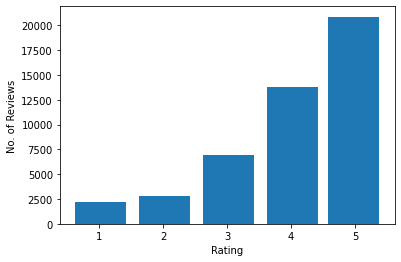

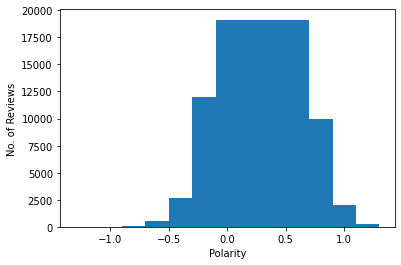

In [17]:
print('The average user review polarity for Las Vegas Hotels is {:.2f}\n'.format(df.polarity.mean()))

## To obatain % of users whose polarity is in the range (-1,1) with a step of 0.25
for i in np.arange(1, -1, -0.25):
  start = i
  end = i-0.25
  nusers = len(df.loc[(df['polarity']<=start) & (df['polarity']>=end)])
  print('% of users review polarity b/w {} - {} : {:.2f} %'.format(end, start, nusers*100/len(df)))


# histogram of rating
counts, bins = np.histogram(df['reviewrating'], bins=100)
bins = bins[:-1] + (bins[1] - bins[0])/2
plt.bar(bins, counts)
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.show()

# histogram of polarities
counts, bins = np.histogram(df['polarity'])
bins = bins[:-1] + (bins[1] - bins[0])/2
plt.bar(bins, counts)
plt.xlabel('Polarity')
plt.ylabel('No. of Reviews')
plt.show()

In [18]:
## To obtain average polarity for each user rating
for i in range(5, 0, -1):
  avg_polarity = df.loc[(df['reviewrating']==i)].polarity.mean()  
  print('Avg. polarity of written review where user gave a rating {} : {:.2f}'.format(i, avg_polarity))



Avg. polarity of written review where user gave a rating 5 : 0.38
Avg. polarity of written review where user gave a rating 4 : 0.29
Avg. polarity of written review where user gave a rating 3 : 0.16
Avg. polarity of written review where user gave a rating 2 : 0.05
Avg. polarity of written review where user gave a rating 1 : -0.02


1) What might you conclude based on this difference about how people rate and how people write?

2) To what degree are polarity and subjectivity correlated with ratings?

3) Use a groupby + corr() statement to calculate the correlation between review ratings and polarity by travel category. 

4) In which categories are review polarity most and least correlated with ratings? Any explanation for this relationship?



In [19]:
## To obtain correlation b/w rating and polarity, subjectivity
print('Correlation b/w polarity and rating : {:.2f}'.format(df['polarity'].corr(df['reviewrating'])))
print('Correlation b/w subjectivity and rating : {:.2f}'.format(df['subjectivity'].corr(df['reviewrating'])))

df.groupby('travel_category')[['polarity','reviewrating']].corr()


Correlation b/w polarity and rating : 0.59
Correlation b/w subjectivity and rating : 0.24


polarity  reviewrating
travel_category                                     
business        polarity      1.000000      0.623229
                reviewrating  0.623229      1.000000
couple          polarity      1.000000      0.568238
                reviewrating  0.568238      1.000000
family          polarity      1.000000      0.599097
                reviewrating  0.599097      1.000000
friends         polarity      1.000000      0.595152
                reviewrating  0.595152      1.000000
solo            polarity      1.000000      0.536387
                reviewrating  0.536387      1.000000

1) Based on the average polarity values for each rating we can conclude, 
  * Even though people rated highly the written reviews were not extremely polar
  (Not so high +ve polarity values for rating of 5)
  * This means that people are more liberal with numerical rating as compared to written ratings

2) We observe relatively high correlation b/w Polarity and Rating (0.6), but low (0.24) correlation between subjectivity and rating.

3,4) The above grid displays the value of correlation b/w rating of each travel category vs polarity.  

> * We observe business users' have highest correlation b/w polarity and rating (Their reviews are more positive).
>> * In this case as business users trip might be sponsored by their company --> more expensive and all paid for stays --> more satisfaction. Hence the postive reviews.
> * Solo users' have the least correlation b/w polarity and rating.
>> * As solo users have to pay for their own stay and expenses --> cheaper stays --> less satisfactory experience, hence the drop in correlation value.


 






# Helper Functions

In [57]:
import spacy, time
from gensim.models.ldamulticore import LdaMulticore # this is the multi-core version
from gensim import corpora # import the corpora module
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from sklearn.model_selection import train_test_split


def line_doc(filename, encode = 'utf-8'):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    with open(filename, 'r', encoding = encode) as f:
        for txt in f:
            # yield returns next line
            yield txt.replace('\\n', '\n')
            # and get rid of any line breaks

# parsing to be done per sentence
def lemmatize(s, exclude):
    return [w.lemma_.lower() for w in s if (w.lemma_ not in exclude)&(~w.is_punct)]
# next will be a function that will pass a filename to the line_doc function
# and generate the parsed versions of ***EVERY SENTENCE***
# this function streams a file at filename and yields one parsed sentence at a time


def lemmatize_sentence_corpus(filename,nlp, batch_size, n_threads, sw=[], exclusions=[], encode = 'utf-8'):
    nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
    # batch_size is the number of documents to parse in memory at a time
    # n_threads it the number of parallel (simultaneous processes to run)
    # n_threads is limited by the number of virtual cpu's on the system
    # the default free Colab system has only 2 virtual cores
    # most modern computers have at least 4
    exclude = set(sw + exclusions)
    for parsed_txt in nlp.pipe(line_doc(filename, encode = encode),batch_size=batch_size, n_threads=n_threads):
            for sent in parsed_txt.sents:
                yield ' '.join(lemmatize(sent, exclude))


def write_parsed_sentence_corpus(readfile, writefile, nlp, batch_size, n_threads, sw=[], exclusions =[], encode = 'utf-8'):
    streamingfile = lemmatize_sentence_corpus(readfile,nlp, batch_size, n_threads, sw=sw, exclusions=exclusions, encode = encode)
    with open(writefile, 'w', encoding = encode) as f:
        for sentence in streamingfile:
            if len(sentence)>0: # write sentence if includes non stopwords
                f.write(sentence+'\n')
    print('Success')


def phrase_detection(parsedfile, folderpath, passes = 2, returnmodels = True,threshold=10., encode = 'utf-8'):
    """
    parsedfile is the file location and name of the parsed sentence file
    folderpath is where the models and phrase detected texts need to be stored

    This function does phrase modeling. User specifies the number of passes.
    Each additional pass detects longer phrases. The maximum detectable phrase length for
    each pass, n, is 2^n.
    Returns the list of models by default. Also saves models and intermediary
    phrased sentences for each pass.
    """
    ngram = list()
    for it in range(passes):
        gen = LineSentence(parsedfile)
        gram=Phrases(gen, threshold = threshold)
        ngram.append(gram)
        modelpath = folderpath+'phrase_model_{}.phrasemodel'.format(it+1)
        textpath = folderpath+'sent_gram_{}.txt'.format(it+1)
        gram.save(modelpath)
        # Write sentence n-gram
        with open(textpath, 'w', encoding=encode) as f:
            for sent in gen:
                new_sent = ' '.join(gram[sent])
                f.write(new_sent + '\n')

    if returnmodels == True:
        return ngram


def phrase_prediction(rawfilepath, outpath,nlp, grams, sw =[], exclusions = [], batch_size = 500, n_threads = 2, encode = 'utf-8'):
    """
    rawfilepath is where the raw reviews (where 1 line = 1 review) are saved 
    outpath is where to save the resulting parsed and phrase modeled reviews
    nlp is the spacy parser object
    grams is a list of phrasemodels
    sw is a list of stopwords
    exclusions are additional words to exclude

    """
    with open(outpath, 'w', encoding = encode) as f:
        
        nlp.disable_pipes(["ner"]) # disable ner and tagger makes it a little faster
        exclude = set(sw + exclusions)
        
        for parsed_txt in nlp.pipe(line_doc(rawfilepath, encode = encode),batch_size=batch_size, n_threads=n_threads):
            doc = list()
            for sent in parsed_txt.sents:
                parsed = lemmatize(sent, exclude)
                for gram in grams: # loop through phrase models
                    parsed = gram[parsed] # apply phrase model transformation to sentence
                doc.append(' '.join(parsed).strip()) # append resulting phrase modeled sentence to list "doc"
            # write the transformed review as a single line in the new file
            txt_gram = ' '.join(doc).strip() # join all sentences in doc together as txt_gram
            f.write(txt_gram + '\n') # write the entire phrase modeled and parsed doc as one line in file

# 2. Topics in hotel reviews 





### Preprocessing the texts

In this part, you will need to borrow the functions (attached):
1. Create a folder on your google drive to save your NLP files
1. Write a file containing raw reviews.
1. Lemmatize this file into a new file of sentences.
    1. remove stopwords
    1. remove punctuation
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Apply phrase model twice to identify phrases of up to 4 words in length.
1. Go back to the raw reviews and lemmatize + apply the phrase models at the review level, write the resulting review-level (1 line = 1 review) file to your NLP folder.
    1. Go grab a coffee while this runs. (takes ~10 mins)
1. Create a column in your dataframe called "parsed" that contains the resulting parsed versions of each reviews.
    1. Be sure to save this dataframe so you don't have to start from scratch (can read it in if you come back to the assignment). 
    1. If you come back to this part, make sure that you that you don't delete the outputs from previous session.
1. List the directory of your NLP folder to show that your intermediate steps have been saved.

1) Writing raw reviews into txt file

2) Calling the write_parsed_sentence_corpus to generate lemmatized text. 

In [58]:
import nltk
import copy

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
exclusions = ['hotel', 'time', 'go', 'stay', 'room', 'get', 'would', 'good', 'one', \
              'vegas', 'night', 'call', 'strip', 'check', 'aria', 'tell', \
              'make', 'could']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
raw_reviews_txt = '/content/drive/MyDrive/YelpTask/files/raw_reviews.txt'

def write_raw_reviews(filename):
    with open(filename, 'w') as f:
        for val in df['reviewtext'].values:
            f.write(val)
            f.write('\n')

#write_raw_reviews(raw_reviews_txt)

lemmatized_txt = '/content/drive/MyDrive/YelpTask/files/lemmatized_reviews.txt'
nlp = spacy.load('en_core_web_sm')

write_parsed_sentence_corpus(raw_reviews_txt, lemmatized_txt, nlp, 500, 2, sw=stop_words, exclusions = exclusions, encode = 'utf-8')


Success


3) Applying phrase model to to identify phrases of length upto 4

In [60]:
folder_path = '/content/drive/MyDrive/YelpTask/files/'
grams = phrase_detection(lemmatized_txt, folder_path, passes = 2, returnmodels = True,threshold=10., encode = 'utf-8')

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


4) Calling the phrase prediction model on raw_reviews_text file and wiritng it into a new column in csv file

In [61]:
nlp = spacy.load('en_core_web_sm')

output_file = '/content/drive/MyDrive/YelpTask/files/output.txt'

phrase_prediction(raw_reviews_txt, output_file, nlp, grams, sw = stop_words, exclusions = exclusions, batch_size = 500, n_threads = 2, encode = 'utf-8')

parsed_lines = [line for line in open(output_file)]

df['parsed'] = parsed_lines

df.to_csv('/content/drive/MyDrive/YelpTask/files/vegas2015reviews_parsed.csv')

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Listing all the intermediate saved files in the directory.

In [62]:
import glob
for f in glob.glob('/content/drive/MyDrive/YelpTask/files/*'):
    print(f)

/content/drive/MyDrive/YelpTask/files/raw_reviews.txt
/content/drive/MyDrive/YelpTask/files/lemmatized_reviews.txt
/content/drive/MyDrive/YelpTask/files/phrase_model_1.phrasemodel
/content/drive/MyDrive/YelpTask/files/sent_gram_1.txt
/content/drive/MyDrive/YelpTask/files/phrase_model_2.phrasemodel
/content/drive/MyDrive/YelpTask/files/sent_gram_2.txt
/content/drive/MyDrive/YelpTask/files/output.txt
/content/drive/MyDrive/YelpTask/files/vegas2015reviews_parsed.csv


### LDA model

Apply the LDA model to the parsed reviews 

1. Create a dictionary
1. Filter extreme words in the dictionary
1. Create a corpus of reviews where 1 document = 1 review.
1. Run the LDA for 10-70 topics (inclusive of 70), skipping 10 at a time. (go grab a coffee, this takes ~ 15 minutes)

**How many topics is best in terms of perplexity?**


In [63]:
output_file = '/content/drive/MyDrive/YelpTask/files/output.txt'

corpus = [line.split() for line in open(output_file, 'r')]
dict_ = corpora.Dictionary(corpus)

dict_copy = copy.deepcopy(dict_)

dict_copy.filter_extremes(no_below = 10, no_above = 0.5)

print(len(dict_), len(dict_copy))
doc_term_matrix = [dict_copy.doc2bow(i) for i in corpus]


42445 9760


In [74]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

lda = LdaMulticore
num_topics_list = [i for i in range(10, 71, 10)]
for num_topics in num_topics_list:
    print('num topics: {}'.format(num_topics))  
    model = lda(doc_term_matrix, num_topics=num_topics, id2word = dict_copy, passes=1, random_state=42)
    perplex = model.log_perplexity(doc_term_matrix)
    print('perplexity : {}'.format(perplex), '\n')

num topics: 10
perplexity : -7.470057982225157 

num topics: 20
perplexity : -7.552327418997605 

num topics: 30
perplexity : -7.623655146842783 

num topics: 40
perplexity : -7.682283181276167 

num topics: 50
perplexity : -7.739091624544812 

num topics: 60
perplexity : -7.7853852925673195 

num topics: 70
perplexity : -7.83887958218865 



We can see that the perplexity of the model is least in case of 10 topics. So we pick this as our best model

In [64]:
lda = LdaMulticore
best_model = lda(doc_term_matrix, num_topics=10, id2word = dict_copy, passes=1, random_state=42)
perplex = best_model.log_perplexity(doc_term_matrix)
print('best model perplexity : {}'.format(perplex), '\n')

best model perplexity : -7.470427392032255 



In [65]:
best_model.print_topics()

[(0,
  '0.047*"great" + 0.025*"staff" + 0.017*"service" + 0.013*"clean" + 0.012*"food" + 0.012*"excellent" + 0.011*"friendly" + 0.011*"love" + 0.010*"always" + 0.010*"amazing"'),
 (1,
  '0.022*"great" + 0.018*"place" + 0.015*"vegas" + 0.013*"pool" + 0.013*"casino" + 0.012*"nice" + 0.009*"love" + 0.007*"lot" + 0.007*"really" + 0.007*"like"'),
 (2,
  '0.025*"nice" + 0.025*"bathroom" + 0.014*"view" + 0.013*"large" + 0.013*"bed" + 0.013*"great" + 0.011*"suite" + 0.010*"well" + 0.010*"clean" + 0.009*"area"'),
 (3,
  '0.008*"also" + 0.008*"need" + 0.008*"clean" + 0.007*"service" + 0.007*"aria" + 0.007*"casino" + 0.007*"well" + 0.006*"staff" + 0.006*"find" + 0.005*"restaurant"'),
 (4,
  '0.021*"charge" + 0.015*"pay" + 0.015*"resort_fee" + 0.014*"use" + 0.012*"service" + 0.009*"$" + 0.008*"fee" + 0.007*"day" + 0.006*"wifi" + 0.006*"even"'),
 (5,
  '0.015*"day" + 0.011*"pool" + 0.008*"wait" + 0.007*"service" + 0.007*"aria" + 0.007*"nice" + 0.006*"give" + 0.006*"never" + 0.006*"first" + 0.005*"l

In [66]:
! pip install pyldavis

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=04f1928d08efcba16c81cd5fcd78d1639d4ce8cfcc2cca2a499b63665e317819
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis



### Visualize the topics. 

1. Load the best model.
1. Create an LDAVis. (remember you have to `! pip install pyldavis` first)
1. **Pick 3 topics that kind of make sense and describe what they represent.**


From the below chart let's pick 3 topics.

1.   Topic 2 (staff, service, clean, food, experience, etc...)
     * This topic represents that the staff are freindly and the hotel is clean and additionally has positive reviews for the restaurant
2.   Topic 1 ( pool, casino, fun, enjoy, food, etc...)
    * This topic describes users had fun at the pool, casino and also enjoyed food.
3. Topic 8 (bathroom, view, large, suite, pool, clean, shower, spacious comfortable, etc...)
    * This topics also represents that the bathroom, pool as clean and also rooms are spacious and comfortable



In [125]:
import pyLDAvis
import pyLDAvis.gensim_models
from collections import Counter
from wordcloud import WordCloud
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(best_model, doc_term_matrix, dict_copy)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.066583 -0.036688       1        1  14.647197
0     -0.119939 -0.098727       2        1  13.416747
6     -0.137868  0.008316       3        1  11.714272
5      0.077990 -0.010424       4        1  10.196763
7      0.119718 -0.032003       5        1  10.183629
9      0.028744  0.032308       6        1  10.037879
8      0.056304  0.053227       7        1   8.344084
2     -0.082439  0.108288       8        1   7.830659
4      0.122970 -0.028430       9        1   7.493324
3      0.001103  0.004134      10        1   6.135447, topic_info=           Term          Freq         Total Category  logprob  loglift
152       great  30589.000000  30589.000000  Default  30.0000  30.0000
283    bathroom   7629.000000   7629.000000  Default  29.0000  29.0000
319      charge   4761.000000   4761.000000  Default  28.0000  28.0000
260  resort_fee   3064.000000   3064.000000  Default  27.0000  27.0000
12         nice  17321.000000  17321.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
54         want    465.092592   8206.602422  Topic10  -5.6116  -0.0794
145         day    461.899480  11289.174472  Topic10  -5.6185  -0.4052
12         nice    484.562876  17321.600719  Topic10  -5.5706  -0.7854
130        walk    422.171404   8089.376689  Topic10  -5.7085  -0.1618
152       great    459.370245  30589.412264  Topic10  -5.6240  -1.4075

[921 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
308       1  0.178733             $
308       2  0.005936             $
308       3  0.012531             $
308       4  0.030009             $
308       5  0.023413             $
...     ...       ...           ...
9638      6  0.010925  zarkana_show
2031      1  0.140830             £
2031      5  0.008802             £
2031      6  0.818572             £
2031      9  0.026406             £

[3472 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 7, 6, 8, 10, 9, 3, 5, 4])


### Use LDA to compare pos vs neg reviewers
Imagine you are the marketing director for one of these hotels (pick one of the resorts), **what are the differences in topics mentioned by satisfied and dissatisfied customers?** 

In order to better understand the positive and neagative reviews at the hotel level let's write a funcion to 
* Get dominant topic for each document and
* The keywords for each document

This will help us to better gauge the reviews as we can compare the positive and negative review using dominant topics and keywords.

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    '''
    This function takes LDA model, Document term matrix and lemmatized document(reviews in our case) as the input and 
    returns a df with Dominant Topics, perceived contribution of that document to the dominant topic, topic ketwords.

    '''
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(best_model, doc_term_matrix, corpus)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# The df_dominant_topic dataframe is concatenated with the df to obtain result dataframe
 
df_dominant_topic.to_csv('/content/drive/MyDrive/YelpTask/files/reviews_topics_by_doc.csv')
result = pd.concat([df, df_dominant_topic], axis=1)

Let's pick the Caesars Palace hotel from the above df and look at positive and negative review and their respective topics




In [122]:
## Get the Caersars palace reviews by v_name
df_caesars = result.loc[result['v_name'] == 'Caesars Palace']

## Let's consider 5 rated reviews as the positive reviews and 
## 1 rated as the negative reviews.
positive_review_keywords, negative_review_keywords = [], []

for value in df_caesars.loc[(df_caesars['reviewrating'] == 5)]['Keywords'].values:
    positive_review_keywords.extend(value.replace(" ", "").split(','))

for value in df_caesars.loc[(df_caesars['reviewrating'] == 1)]['Keywords'].values:
    negative_review_keywords.extend(value.replace(" ", "").split(','))

# From these keywords let's get the cloud word frequency dictionaries to 
# generate a word cloud 

positive_could_dict, negative_cloud_dict = Counter(positive_review_keywords), Counter(negative_review_keywords)

Positive (5) rated reviews topic keyword Word Cloud

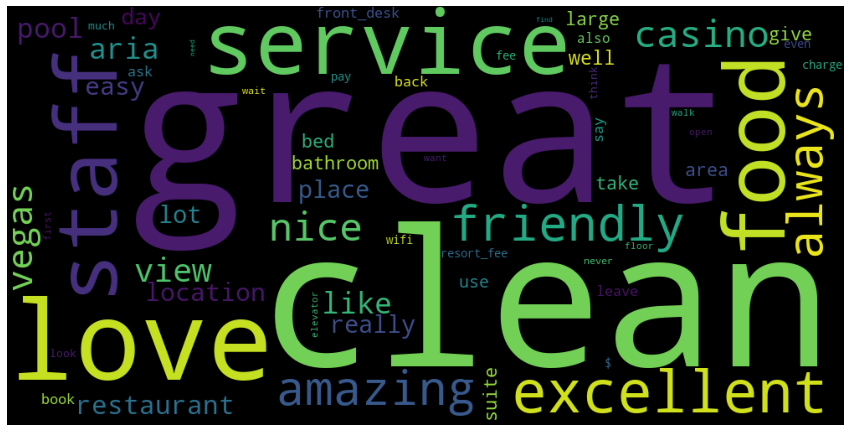

In [126]:

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(positive_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

Neagative (1) rated reviews topic keyword Word Cloud

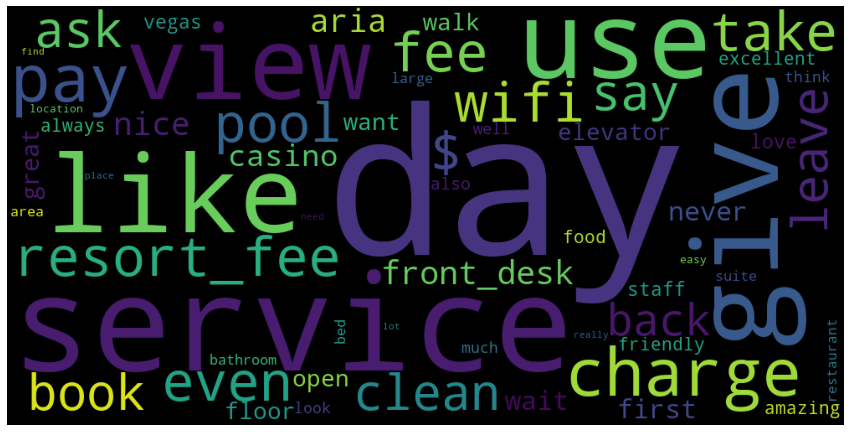

In [132]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(negative_cloud_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

* From these word clouds we can clearly see that the users who rated positively (5) loved the 
    * service, cleanliness, friendly staff etc..

* We can also infer that users who rated negatively (1) are worried about the  
    * wifi, $ (charges), fee, resort_fee, waiting

From the above inferences manager could work on the topics derived from the dissatisfied customer reviews such as wifi connectivity, resort fees, charges, etc.., to improve their services and attract more customers.